# Decision tree on Home Equity Loans Data set

We are going to make a decicion tree on Home Equity Loans data set.
The variables of this data set are explain like that.

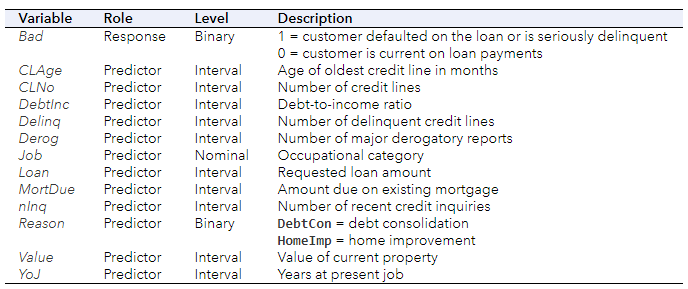

In [3]:
# Libraries importations
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn import metrics, tree
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Working directory
os.chdir("D:\\Documents\\My SAS Files\\Credit Risk Modeling\\00 creditriskmodeling Data")

In [5]:
# Data set importation and visualization
hmeq = pd.read_csv("hmeq.csv")
hmeq.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [6]:
# Data set dimensions
hmeq.shape

(5960, 13)

 Our data set contain 5960 observations and 13 variables.

In [7]:
# informations about the variables
hmeq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


We are not going to drop the missing values from our data set and going to see what happen.

In [8]:
# visualization of all data set
pd.set_option("display.max_rows",5960)
pd.set_option("display.max_columns",13)
hmeq

BAD   LOAN    MORTDUE      VALUE   REASON      JOB    YOJ  DEROG  \
0       1   1100   25860.00   39025.00  HomeImp    Other  10.50    0.0   
1       1   1300   70053.00   68400.00  HomeImp    Other   7.00    0.0   
2       1   1500   13500.00   16700.00  HomeImp    Other   4.00    0.0   
3       1   1500        NaN        NaN      NaN      NaN    NaN    NaN   
4       0   1700   97800.00  112000.00  HomeImp   Office   3.00    0.0   
5       1   1700   30548.00   40320.00  HomeImp    Other   9.00    0.0   
6       1   1800   48649.00   57037.00  HomeImp    Other   5.00    3.0   
7       1   1800   28502.00   43034.00  HomeImp    Other  11.00    0.0   
8       1   2000   32700.00   46740.00  HomeImp    Other   3.00    0.0   
9       1   2000        NaN   62250.00  HomeImp    Sales  16.00    0.0   
10      1   2000   22608.00        NaN      NaN      NaN  18.00    NaN   
11      1   2000   20627.00   29800.00  HomeImp   Office  11.00    0.0   
12      1   2000   45000.00   55000.00  HomeImp    Other   3.00    0.0   
13      0   2000   64536.00   87400.00      NaN      Mgr   2.50    0.0   
14      1   2100   71000.00   83850.00  HomeImp    Other   8.00    0.0   
15      1   2200   24280.00   34687.00  HomeImp    Other    NaN    0.0   
16      1   2200   90957.00  102600.00  HomeImp      Mgr   7.00    2.0   
17      1   2200   23030.00        NaN      NaN      NaN  19.00    NaN   
18      1   2300   28192.00   40150.00  HomeImp    Other   4.50    0.0   
19      0   2300  102370.00  120953.00  HomeImp   Office   2.00    0.0   
20      1   2300   37626.00   46200.00  HomeImp    Other   3.00    0.0   
21      1   2400   50000.00   73395.00  HomeImp  ProfExe   5.00    1.0   
22      1   2400   28000.00   40800.00  HomeImp      Mgr  12.00    0.0   
23      1   2400   18000.00        NaN  HomeImp      Mgr  22.00    NaN   
24      1   2400        NaN   17180.00  HomeImp    Other    NaN    0.0   
25      1   2400   34863.00   47471.00  HomeImp      Mgr  12.00    0.0   
26      0   2400   98449.00  117195.00  HomeImp   Office   4.00    0.0   
27      1   2500   15000.00   20200.00  HomeImp      NaN  18.00    0.0   
28      1   2500   25116.00   36350.00  HomeImp    Other  10.00    1.0   
29      0   2500    7229.00   44516.00  HomeImp     Self    NaN    0.0   
30      0   2500   71408.00   78600.00  HomeImp  ProfExe   8.00    0.0   
31      1   2800   50795.00   63100.00  HomeImp     Self  26.00    2.0   
32      1   2800    4000.00   60850.00  HomeImp    Other  16.00    4.0   
33      1   2900   78600.00  113000.00  DebtCon  ProfExe   6.00    1.0   
34      0   2900  103949.00  112505.00  HomeImp   Office   1.00    0.0   
35      0   2900  104373.00  120702.00  HomeImp   Office   2.00    0.0   
36      1   2900    7750.00   67996.00  HomeImp    Other  16.00    3.0   
37      1   2900   61962.00   70915.00  DebtCon      Mgr   2.00    0.0   
38      0   3000  104570.00  121729.00  HomeImp   Office   2.00    0.0   
39      1   3000    7000.00   20300.00  HomeImp    Other   3.00    0.0   
40      1   3000        NaN    8800.00  HomeImp    Other   2.00    0.0   
41      1   3000        NaN   33000.00  HomeImp    Other   1.00    0.0   
42      1   3000  119826.00  193500.00  HomeImp    Other   8.00    0.0   
43      1   3000   20000.00   29750.00  DebtCon    Other   2.00    0.0   
44      1   3000        NaN   14500.00  HomeImp    Other   3.00    0.0   
45      1   3000        NaN   14100.00  HomeImp    Other   1.00    0.0   
46      1   3000   47000.00   82700.00  HomeImp  ProfExe  10.00    0.0   
47      1   3000   34542.00   45900.00  HomeImp      Mgr   8.50    0.0   
48      0   3000   58000.00   71500.00  HomeImp      Mgr  10.00    NaN   
49      0   3000   47000.00   56400.00  HomeImp   Office  21.00    0.0   
50      1   3100   39589.00   36100.00  HomeImp    Other   1.50    0.0   
51      0   3100        NaN   70400.00      NaN      NaN    NaN    NaN   
52      0   3200   67848.00   74566.00  HomeImp      Mgr  10.00    NaN   
53      1 

<b> Somme descriptives statistiques to understant our dataset</b>

In [9]:
hmeq.describe(include=['object'])

REASON    JOB
count      5708   5681
unique        2      6
top     DebtCon  Other
freq       3928   2388

We have only two categorical variables in our data set.

In [10]:
hmeq.describe()

BAD          LOAN        MORTDUE          VALUE          YOJ  \
count  5960.000000   5960.000000    5442.000000    5848.000000  5445.000000   
mean      0.199497  18607.969799   73760.817200  101776.048741     8.922268   
std       0.399656  11207.480417   44457.609458   57385.775334     7.573982   
min       0.000000   1100.000000    2063.000000    8000.000000     0.000000   
25%       0.000000  11100.000000   46276.000000   66075.500000     3.000000   
50%       0.000000  16300.000000   65019.000000   89235.500000     7.000000   
75%       0.000000  23300.000000   91488.000000  119824.250000    13.000000   
max       1.000000  89900.000000  399550.000000  855909.000000    41.000000   

             DEROG       DELINQ        CLAGE         NINQ         CLNO  \
count  5252.000000  5380.000000  5652.000000  5450.000000  5738.000000   
mean      0.254570     0.449442   179.766275     1.186055    21.296096   
std       0.846047     1.127266    85.810092     1.728675    10.138933   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000   115.116702     0.000000    15.000000   
50%       0.000000     0.000000   173.466667     1.000000    20.000000   
75%       0.000000     0.000000   231.562278     2.000000    26.000000   
max      10.000000    15.000000  1168.233561    17.000000    71.000000   

           DEBTINC  
count  4693.000000  
mean     33.779915  
std       8.601746  
min       0.524499  
25%      29.140031  
50%      34.818262  
75%      39.003141  
max     203.312149

In [11]:
# Distribution of our target
hmeq.BAD.value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

In [12]:
# Distribution in % of our target
hmeq.BAD.value_counts(normalize=True)

0    0.800503
1    0.199497
Name: BAD, dtype: float64

Without missing values, the HMEQ data set contain : <br>
<ul>
    <li>91% of applicants paid correctly their loan</li>
    <li>9% of applicant defaulted on loan or seriously delinquent</li>
</ul>

And with missing values, the distribution is :
<ul>
    <li>80% of applicants paid correctly their loan</li>
    <li>20% of applicant defaulted on loan or seriously delinquent</li>
</ul>
<b>That's why we are not going to drop the missing values.</b>

# 2. Data preprossessing 

<h3>1. Conversion of categorical variables</h3>

We have two categoral variables in our data set : Reason & Job.

In [13]:
# list of categorical variables

categorical =  [var for var in hmeq.columns[:-1] if hmeq[var].dtype == np.object_]
categorical

['REASON', 'JOB']

In [14]:
# categorical variables encoding
categorical_Encoded = pd.get_dummies(hmeq[categorical])
categorical_Encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   REASON_DebtCon  5960 non-null   uint8
 1   REASON_HomeImp  5960 non-null   uint8
 2   JOB_Mgr         5960 non-null   uint8
 3   JOB_Office      5960 non-null   uint8
 4   JOB_Other       5960 non-null   uint8
 5   JOB_ProfExe     5960 non-null   uint8
 6   JOB_Sales       5960 non-null   uint8
 7   JOB_Self        5960 non-null   uint8
dtypes: uint8(8)
memory usage: 46.7 KB


After this encoding, we are going to group the quantitative data and create our last data set by concatenate the categorical encoded group and the numerical data groupe of our data set.

In [15]:
# Create a quantitative data group
Quanti = [var for var in hmeq.columns[:-1] if hmeq[var].dtype != np.object_]
Quanti

['BAD',
 'LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO']

In [16]:
# We are goint to Concatenate the dummies variables and quantitative variables in the same dataframe
hmeq_clean = pd.concat([hmeq[Quanti],categorical_Encoded],axis=1)
hmeq_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BAD             5960 non-null   int64  
 1   LOAN            5960 non-null   int64  
 2   MORTDUE         5442 non-null   float64
 3   VALUE           5848 non-null   float64
 4   YOJ             5445 non-null   float64
 5   DEROG           5252 non-null   float64
 6   DELINQ          5380 non-null   float64
 7   CLAGE           5652 non-null   float64
 8   NINQ            5450 non-null   float64
 9   CLNO            5738 non-null   float64
 10  REASON_DebtCon  5960 non-null   uint8  
 11  REASON_HomeImp  5960 non-null   uint8  
 12  JOB_Mgr         5960 non-null   uint8  
 13  JOB_Office      5960 non-null   uint8  
 14  JOB_Other       5960 non-null   uint8  
 15  JOB_ProfExe     5960 non-null   uint8  
 16  JOB_Sales       5960 non-null   uint8  
 17  JOB_Self        5960 non-null   u

In [17]:
# Columns names extraction
hmeq_clean.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr',
       'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self'],
      dtype='object')

In [49]:
hmeqdf = hmeq.dropna()
hmeqdf.shape

(4438, 18)

In [51]:
hmeqdf.BAD.value_counts(normalize=True)

0    0.803515
1    0.196485
Name: BAD, dtype: float64

In [52]:
# Reoganize the columns names structure to put the target "BAD" in the last position
hmeq = hmeqdf[['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr',
       'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self', 'BAD']]
hmeq.head()

LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ  ...  JOB_Office  JOB_Other  \
0  1100  25860.0   39025.0  10.5    0.0     0.0  ...           0          1   
1  1300  70053.0   68400.0   7.0    0.0     2.0  ...           0          1   
2  1500  13500.0   16700.0   4.0    0.0     0.0  ...           0          1   
4  1700  97800.0  112000.0   3.0    0.0     0.0  ...           1          0   
5  1700  30548.0   40320.0   9.0    0.0     0.0  ...           0          1   

   JOB_ProfExe  JOB_Sales  JOB_Self  BAD  
0            0          0         0    1  
1            0          0         0    1  
2            0          0         0    1  
4            0          0         0    0  
5            0          0         0    1  

[5 rows x 18 columns]

In [53]:
hmeq.shape

(4438, 18)

In [54]:
#Split into training and testing sets with a partition of 30% in test sample and 70% in training sample

hmeqTrain, hmeqTest = train_test_split(hmeq,
                                   test_size=.3,
                                   random_state=1,
                                   stratify=hmeq.BAD)

In [55]:
# Dimensions check
print("The dimensions of training sample is: ",hmeqTrain.shape)
print("The dimensions of test sample is: ",hmeqTest.shape)

The dimensions of training sample is:  (3106, 18)
The dimensions of test sample is:  (1332, 18)


In [56]:
# let's go check our Target dispersion 
print("The target dispersion in the training sample :",hmeqTrain.BAD.value_counts())
# Target dispersion in %
hmeqTrain.BAD.value_counts(normalize=True)

The target dispersion in the training sample : 0    2496
1     610
Name: BAD, dtype: int64


0    0.803606
1    0.196394
Name: BAD, dtype: float64

In [57]:
# let's go check our Target dispersion in test sample
print("The target dispersion in the test sample :",hmeqTest.BAD.value_counts())
# Target dispersion in % in test sample
hmeqTest.BAD.value_counts(normalize=True)

The target dispersion in the test sample : 0    1070
1     262
Name: BAD, dtype: int64


0    0.803303
1    0.196697
Name: BAD, dtype: float64

That's good, we have 80% of good customer and 20% of Bad customer in all of our samples like the same dispersion in our original dataset.

# 2. Classification tree without deph and nodes controling

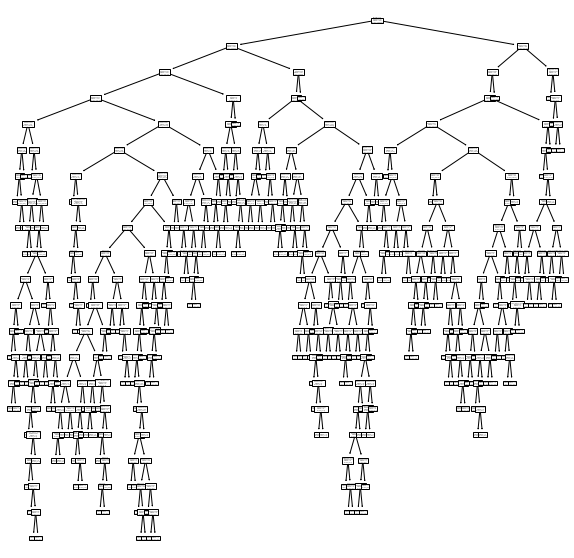

In [58]:
# Check the classification tree parameters with just the entropy criterion
tree_01 = DecisionTreeClassifier(criterion='entropy')

# Tree building
tree_01 = tree_01.fit(X = hmeqTrain.iloc[:,:-1], y = hmeqTrain.BAD)

# affichage plus grand pour une meilleure lisibilité
plt.figure(figsize=(10,10))
plot_tree(tree_01,feature_names = list(hmeq.columns[:-1]),filled=False)
plt.show()

In [60]:
# Display the classification tree as rulers

tree01_rules = tree.export_text(tree_01, feature_names = list(hmeq.columns[:-1]), show_weights=True)
print(tree01_rules)

|--- DELINQ <= 0.50
|   |--- CLAGE <= 172.56
|   |   |--- NINQ <= 3.50
|   |   |   |--- LOAN <= 10050.00
|   |   |   |   |--- MORTDUE <= 40695.50
|   |   |   |   |   |--- CLNO <= 28.00
|   |   |   |   |   |   |--- YOJ <= 13.00
|   |   |   |   |   |   |   |--- weights: [0.00, 34.00] class: 1
|   |   |   |   |   |   |--- YOJ >  13.00
|   |   |   |   |   |   |   |--- CLAGE <= 87.05
|   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- CLAGE >  87.05
|   |   |   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |--- CLNO >  28.00
|   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |--- MORTDUE >  40695.50
|   |   |   |   |   |--- CLNO <= 5.50
|   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |--- CLNO >  5.50
|   |   |   |   |   |   |--- YOJ <= 0.95
|   |   |   |   |   |   |   |--- JOB_Other <= 0.50
|   |   |   |   |   |   |   |   |--- MORTDUE <= 106571.00
|   |   

<b>The rules are easier to understand when the classification tree is very large like our case here.</b>

In [61]:
# prediction on test sample
predictions=tree_01.predict(hmeqTest.iloc[:,:-1])

# confusion matrix
metrics.confusion_matrix(hmeqTest.BAD,predictions)

array([[997,  73],
       [ 87, 175]], dtype=int64)

In [62]:
# Rate of precision
metrics.accuracy_score(hmeqTest.BAD, predictions)

0.8798798798798799

In [63]:
# Error rate
1.0 - metrics.accuracy_score(hmeqTest.BAD, predictions)

0.12012012012012008

In [64]:
# Prediction report
print(metrics.classification_report(hmeqTest.BAD, predictions))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1070
           1       0.71      0.67      0.69       262

    accuracy                           0.88      1332
   macro avg       0.81      0.80      0.81      1332
weighted avg       0.88      0.88      0.88      1332



In [65]:
# Variable importance
varimp_01 = {"Variable":hmeq.columns[:-1],"Importance":tree_01.feature_importances_}
pd.DataFrame(varimp_01).sort_values(by="Importance",ascending=False)

Variable  Importance
8             CLNO    0.130444
1          MORTDUE    0.127015
6            CLAGE    0.126920
2            VALUE    0.120575
0             LOAN    0.120388
5           DELINQ    0.108887
3              YOJ    0.078444
7             NINQ    0.077595
4            DEROG    0.045779
14     JOB_ProfExe    0.014257
13       JOB_Other    0.013345
15       JOB_Sales    0.010258
12      JOB_Office    0.008915
11         JOB_Mgr    0.008059
10  REASON_HomeImp    0.004921
9   REASON_DebtCon    0.004200
16        JOB_Self    0.000000

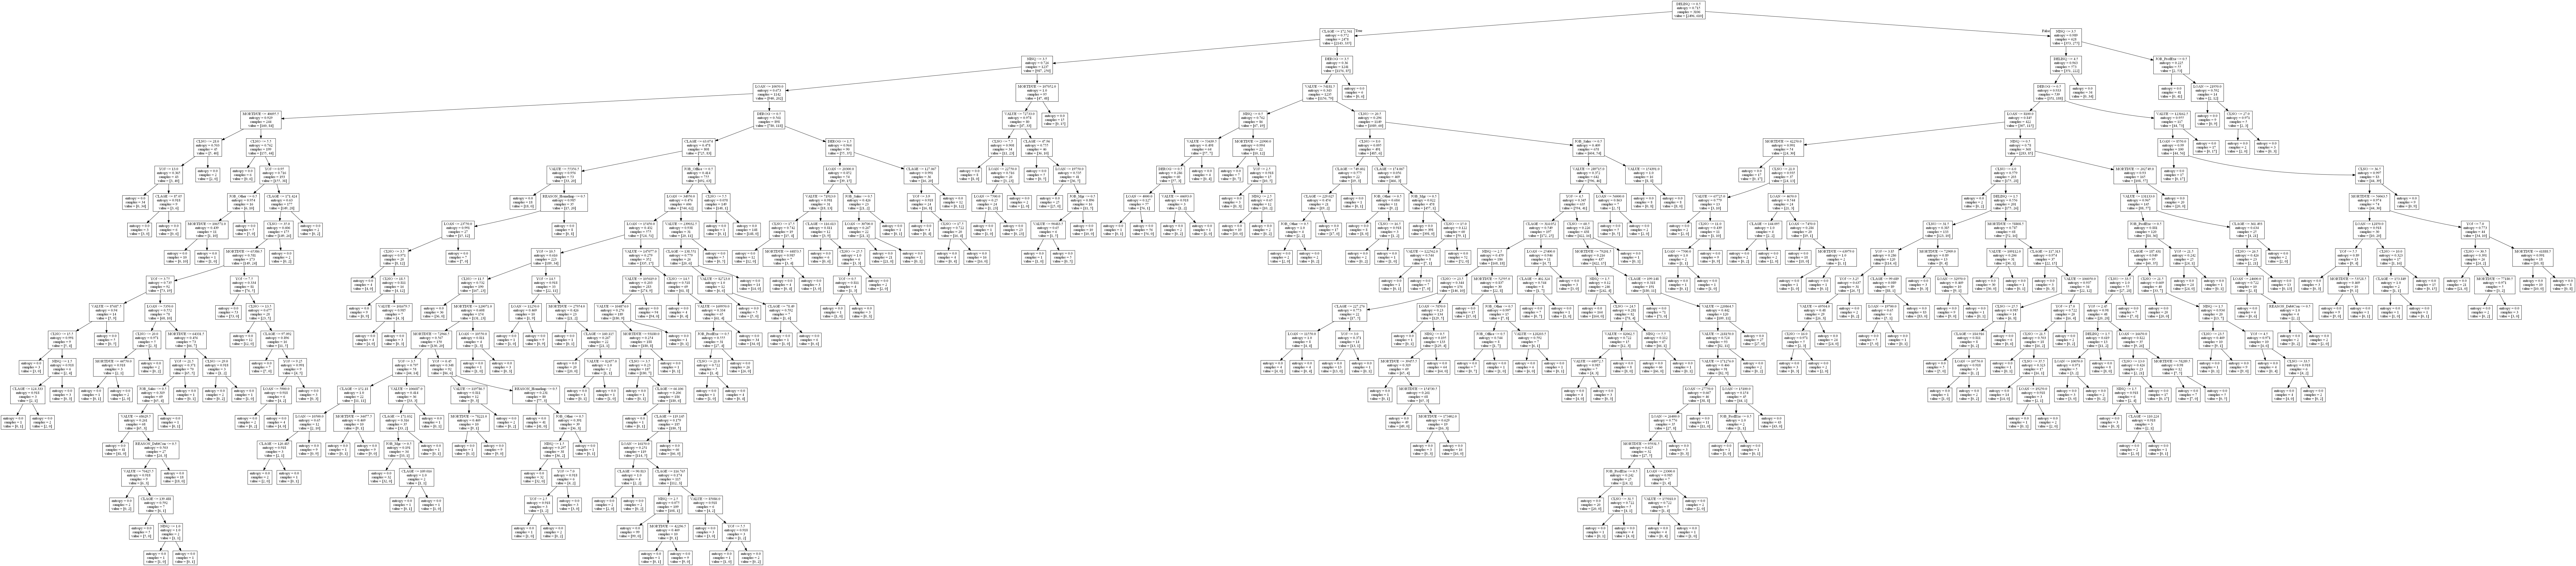

<Figure size 1800x1800 with 0 Axes>

In [69]:
# Importation of additionnal library for saving the graph
from IPython.display import Image
import pydotplus

# create the classification tree again
hmeqDTree_01 = tree.export_graphviz(tree_01, feature_names = list(hmeqTrain.columns[:-1]),filled=False)

# Draw the graph
hmeqtree_01 = pydotplus.graph_from_dot_data(hmeqDTree_01)

# display the graph
Image(hmeqtree_01.create_png())

In [70]:
# Create PDF
hmeqtree_01.write_pdf("C:\\Users\\X230\\Downloads\\Jupyter doc\\TP_1\\ML for DA Coursera\\HMEQ_01.pdf")

# Create PNG
hmeqtree_01.write_png("C:\\Users\\X230\\Downloads\\Jupyter doc\\TP_1\\ML for DA Coursera\\HMEQ_01DTree.png")

True

This classification tree is too large, that's going to decrease the predictive capacity of our model. 

<b>The rate of precision is 87.98%</b>

Let's go to solve that in parameters of max_deph and max_leaf_nodes and let check the model predictive capacity again.

# 3. Classification tree with deph and nodes parameters

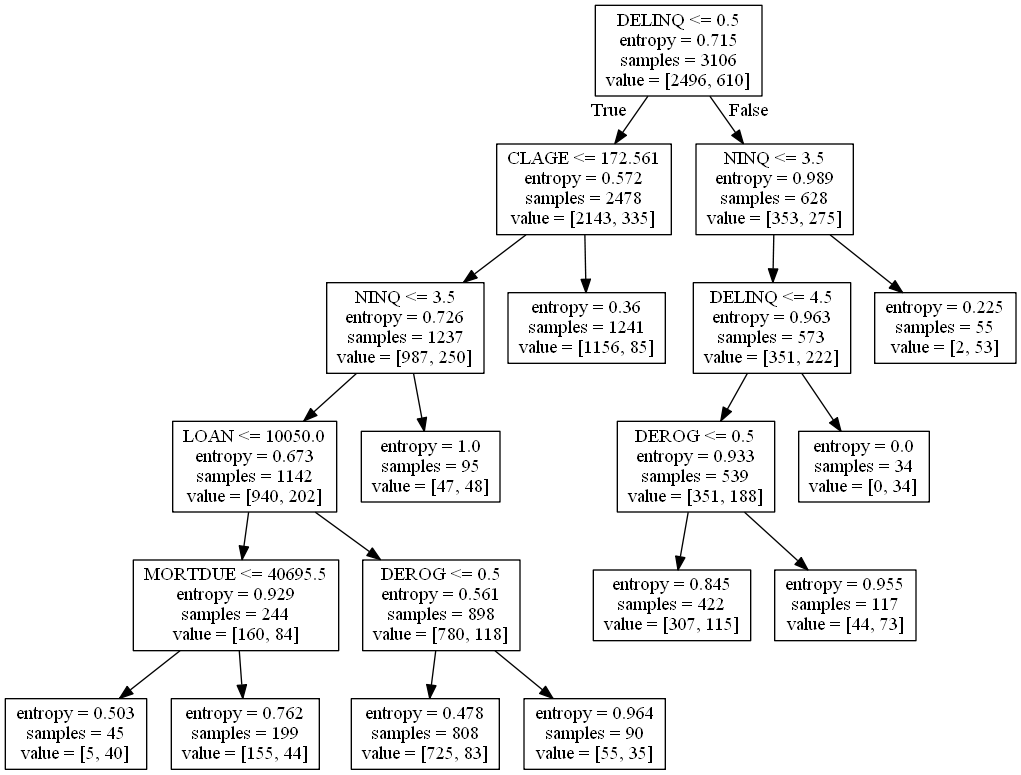

In [71]:
# choose the entropy criterion like in SAS
tree_02=DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

#Build model on training data
tree_02=tree_02.fit(X = hmeqTrain.iloc[:,:-1], y = hmeqTrain.BAD)

# create the classification tree with graphviz
hmeqDTree_02 = tree.export_graphviz(tree_02, feature_names = list(hmeq.columns[:-1]),filled=False)

# Draw the graph
hmeqtree_02 = pydotplus.graph_from_dot_data(hmeqDTree_02)

# display the graph
Image(hmeqtree_02.create_png())

In [72]:
# Let save this graph in PDF format
hmeqtree_02.write_pdf("C:\\Users\\X230\\Downloads\\Jupyter doc\\TP_1\\ML for DA Coursera\\HMEQ_02.pdf")

# Create PNG
hmeqtree_02.write_png("C:\\Users\\X230\\Downloads\\Jupyter doc\\TP_1\\ML for DA Coursera\\HMEQ_02DTree.png")

True

In [73]:
# Display the classification tree as rulers

tree02_rules = tree.export_text(tree_02, feature_names = list(hmeq.columns[:-1]), show_weights=True)
print(tree02_rules)

|--- DELINQ <= 0.50
|   |--- CLAGE <= 172.56
|   |   |--- NINQ <= 3.50
|   |   |   |--- LOAN <= 10050.00
|   |   |   |   |--- MORTDUE <= 40695.50
|   |   |   |   |   |--- weights: [5.00, 40.00] class: 1
|   |   |   |   |--- MORTDUE >  40695.50
|   |   |   |   |   |--- weights: [155.00, 44.00] class: 0
|   |   |   |--- LOAN >  10050.00
|   |   |   |   |--- DEROG <= 0.50
|   |   |   |   |   |--- weights: [725.00, 83.00] class: 0
|   |   |   |   |--- DEROG >  0.50
|   |   |   |   |   |--- weights: [55.00, 35.00] class: 0
|   |   |--- NINQ >  3.50
|   |   |   |--- weights: [47.00, 48.00] class: 1
|   |--- CLAGE >  172.56
|   |   |--- weights: [1156.00, 85.00] class: 0
|--- DELINQ >  0.50
|   |--- NINQ <= 3.50
|   |   |--- DELINQ <= 4.50
|   |   |   |--- DEROG <= 0.50
|   |   |   |   |--- weights: [307.00, 115.00] class: 0
|   |   |   |--- DEROG >  0.50
|   |   |   |   |--- weights: [44.00, 73.00] class: 1
|   |   |--- DELINQ >  4.50
|   |   |   |--- weights: [0.00, 34.00] class: 1
|   |---

<h3>Let's check the predictive capability of our model on the test sample.</h3>

In [77]:
# prediction on test sample
predictions_02=tree_02.predict(hmeqTest.iloc[:,:-1])

# confusion matrix
metrics.confusion_matrix(hmeqTest.BAD,predictions_02)

array([[1011,   59],
       [ 168,   94]], dtype=int64)

In [78]:
# Rate of precision
metrics.accuracy_score(hmeqTest.BAD, predictions_02)

0.8295795795795796

In [79]:
# Error rate
1.0 - metrics.accuracy_score(hmeqTest.BAD, predictions_02)

0.17042042042042038

In [80]:
# Prediction report
print(metrics.classification_report(hmeqTest.BAD, predictions_02))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1070
           1       0.61      0.36      0.45       262

    accuracy                           0.83      1332
   macro avg       0.74      0.65      0.68      1332
weighted avg       0.81      0.83      0.81      1332



Our first model (with all deph and nodes) shows the good accuracy on the test sample (88%) but the reading of our tree was so difficult. When we check the parameters, that's will show us the simple reading tree but decrease the predictive capacity in the same time (83%).

In [81]:
# Variable importance
varimp_02 = {"Variable":hmeq.columns[:-1],"Importance":tree_02.feature_importances_}
pd.DataFrame(varimp_02).sort_values(by="Importance",ascending=False)

Variable  Importance
5           DELINQ    0.421060
7             NINQ    0.165722
6            CLAGE    0.128891
4            DEROG    0.119824
1          MORTDUE    0.095137
0             LOAN    0.069367
11         JOB_Mgr    0.000000
15       JOB_Sales    0.000000
14     JOB_ProfExe    0.000000
13       JOB_Other    0.000000
12      JOB_Office    0.000000
8             CLNO    0.000000
10  REASON_HomeImp    0.000000
9   REASON_DebtCon    0.000000
3              YOJ    0.000000
2            VALUE    0.000000
16        JOB_Self    0.000000

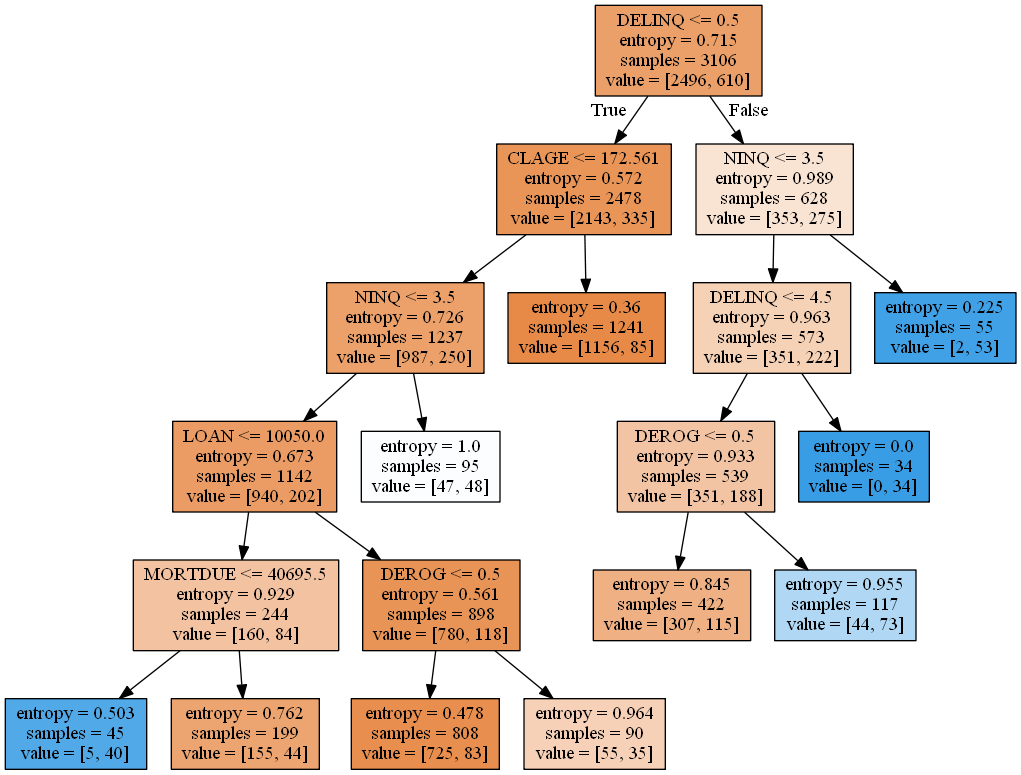

In [82]:
# create the classification tree with graphviz
hmeqDTree_03 = tree.export_graphviz(tree_02, feature_names = list(hmeq.columns[:-1]),filled=True)

# Draw the graph
hmeqtree_03 = pydotplus.graph_from_dot_data(hmeqDTree_03)

# display the graph
Image(hmeqtree_03.create_png())

***************************************************************************
<br>




***************************************************************************
<br>




***************************************************************************
<br>